In [181]:
import torch

m = torch.randint(50, 150, (1,)).item()
trueWeight, trueBias, spread = torch.rand(1) * 4.5 + 0.5, torch.randint(-3, 3, (1,)), torch.rand(1) * 0.1
X = torch.rand(m, 1) * 10 - 5
Y = torch.clamp(torch.sigmoid(trueWeight * X + trueBias) + torch.randn(m, 1) * spread, 0, 1)

In [182]:
weight = torch.randn(1, 1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)
eta, epoch = 0.1, 15000
criterion = torch.nn.BCEWithLogitsLoss()

for e in range(epoch):
    lastWeight = weight.clone()
    lastBias = bias.clone()
    loss = criterion(X @ weight + bias, Y)
    loss.backward()
    with torch.no_grad():
        weight -= eta * weight.grad
        bias -= eta * bias.grad
    weight.grad.zero_()
    bias.grad.zero_()
    if torch.allclose(weight, lastWeight, atol=1e-8) and torch.allclose(bias, lastBias, atol=1e-8):
        print(f"Converged at epoch {e}")
        break

weight.flatten(), bias

Converged at epoch 1062


(tensor([1.3649], grad_fn=<ViewBackward0>),
 tensor([0.3564], requires_grad=True))

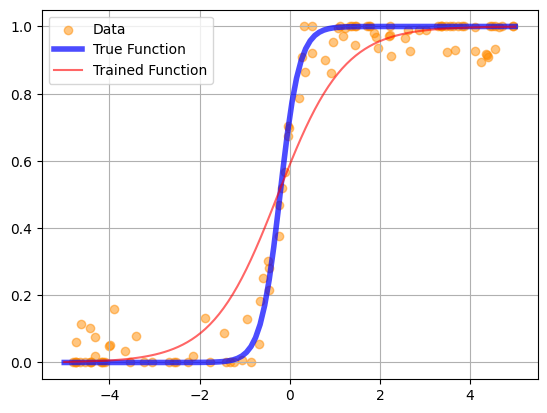

(tensor(0.4051),
 tensor(0.2324, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>))

In [183]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='darkorange', alpha=0.5, label='Data')
trainedFuncX = trueFuncX = torch.linspace(-5, 5, 100)
trueFuncY = torch.sigmoid(trueWeight * trueFuncX + trueBias)
trainedFuncY = torch.sigmoid(weight.flatten() * trainedFuncX + bias)
plt.plot(trueFuncX, trueFuncY, color='blue', linewidth=4, alpha=0.7, label='True Function')
plt.plot(trainedFuncX.detach(), trainedFuncY.detach(), color='red', alpha=0.6, label='Trained Function')
plt.grid()
plt.legend()
plt.show()

criterion(trueWeight * X + trueBias, Y), criterion(weight * X + bias, Y)